# Assignment 3 CLUSTERING

In [20]:
import pandas as pd

# Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [21]:
# Merge datasets
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Feature Engineering: Aggregate data at the customer level
customer_segmentation = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'nunique',  # Number of transactions
    'Category': lambda x: x.mode()[0],  # Most purchased category
}).reset_index()

# Rename columns for clarity
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'TransactionCount', 'TopCategory']

# Convert categorical columns to numerical (one-hot encoding)
customer_segmentation = pd.get_dummies(customer_segmentation, columns=['TopCategory'])

# Fill missing values if any
customer_segmentation = customer_segmentation.fillna(0)

customer_segmentation.head()


,CustomerID,TotalSpending,TransactionCount,TopCategory_Books,TopCategory_Clothing,TopCategory_Electronics,TopCategory_Home Decor
0,C0001,3354.52,5,0,0,1,0
1,C0002,1862.74,4,0,1,0,0
2,C0003,2725.38,4,0,0,0,1
3,C0004,5354.88,8,1,0,0,0
4,C0005,2034.24,3,0,0,1,0


In [22]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features for scaling
numerical_features = customer_segmentation.drop(columns=['CustomerID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (199, 6)


In [23]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features for clustering
numerical_features = customer_segmentation.drop(columns=['CustomerID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (199, 6)


In [26]:
# Assuming 'customer_segmentation' is your DataFrame
numerical_features = customer_segmentation.drop(columns=['CustomerID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (199, 7)


DB Index: 1.3282080107857548


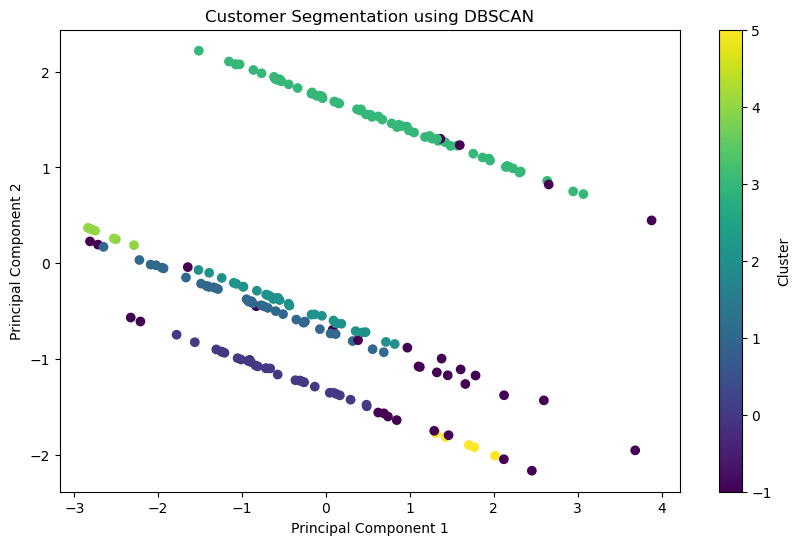

Number of Clusters: 6


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Merge datasets
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Feature Engineering: Aggregate data at the customer level
customer_segmentation = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'nunique',  # Number of transactions
    'Category': lambda x: x.mode()[0],  # Most purchased category
}).reset_index()

# Rename columns for clarity
customer_segmentation.columns = ['CustomerID', 'TotalSpending', 'TransactionCount', 'TopCategory']

# Convert categorical columns to numerical (one-hot encoding)
customer_segmentation = pd.get_dummies(customer_segmentation, columns=['TopCategory'])

# Fill missing values if any
customer_segmentation = customer_segmentation.fillna(0)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation.drop('CustomerID', axis=1))

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples for better results
customer_segmentation['Cluster'] = dbscan.fit_predict(scaled_data)

# Calculate clustering metrics (DB Index)
db_index = davies_bouldin_score(scaled_data, customer_segmentation['Cluster'])

# Print DB Index
print(f"DB Index: {db_index}")

# Visualize the clusters (2D visualization using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_segmentation['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Report: Number of clusters and DB Index
print(f"Number of Clusters: {len(set(customer_segmentation['Cluster'])) - (1 if -1 in customer_segmentation['Cluster'].values else 0)}")
